The claim was made that 8,000 contributions to Beto's campaign came from Texas for Beto while 84 thousand donations came from outside of Texas. A cursory glance of the data indicated this was false. Of 105011 individual contributionslisted there were 45760 contributions where the state was listed as Texas.  Meaning nearly half were from Texas.There were some that had no state listed as their type.

So given that the cursory glance indicated the claim was incorrect I had to consider other possiblities.It does appear that people who donate multiple times are accounted for on more than one line, so perhaps they had aggregated donations? Maybe when aggregated it's only a handful of texans providing large individual contributions?.


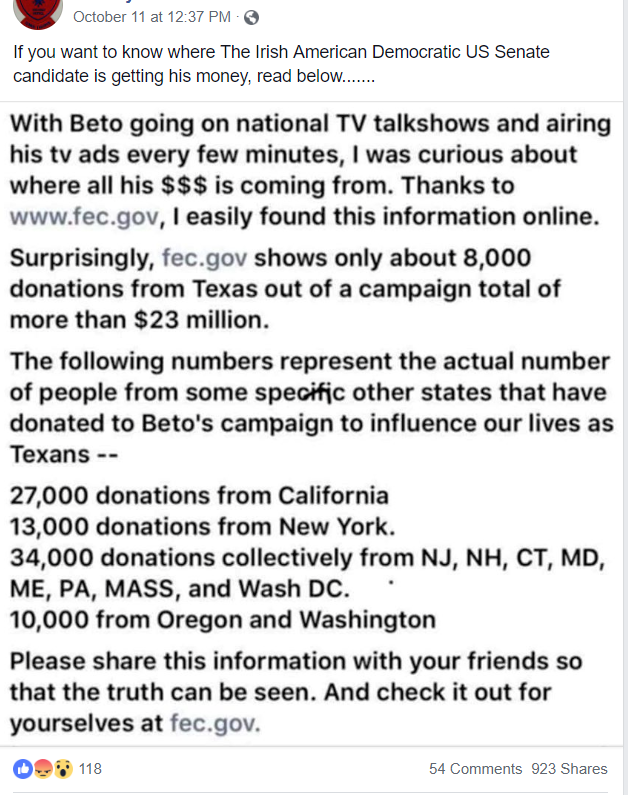

In [1]:
from IPython.display import Image

print("The claim was made that 8,000 contributions to Beto's campaign came from Texas for Beto while 84 thousand "
    "donations came from outside of Texas. A cursory glance of the data indicated this was false. Of 105011 individual "
    "contributions" 
    "listed there were 45760 contributions where the state was listed as Texas.  Meaning nearly half were from Texas." 
    "There were some that had no state listed as their type.\n")
print("So given that the cursory glance indicated the claim was incorrect I had to consider other possiblities."
     "It does appear that people who donate multiple times are accounted for on more than one line, so perhaps"
      " they had aggregated donations? Maybe when aggregated it's only a handful of texans providing large "
      "individual contributions?.")
Image(filename="img/theClaim.png")



In [2]:
import pandas
import numpy
info = pandas.read_csv("data/schedule_a-2018-10-14T00_45_54.csv")


C:\Users\fred\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (12,22,34) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
print("After loading the data I needed to drop the columns that weren't relevant to make looking at the data directly easier"
     " In doing so I learned that they actually make public what your street address is when you donate, which is a little"
     " concerning I think in today's political climate, but what do I know?")
keep = set(['report_year', 'report_type','entity_type', 'entity_type_desc',
       'contributor_prefix', 'contributor_name',
       'contributor_first_name', 'contributor_middle_name',
       'contributor_last_name', 'contributor_suffix', 'contributor_city', 'contributor_state',
       'contributor_occupation',
       'contributor_id',
       'contribution_receipt_amount',
       'contributor_aggregate_ytd'])
remove = list(set(info.columns).difference(keep))
info = info.drop(columns=remove)

print("After doing that it was time to see if there was any honest way the claim could be true." 
      " How many unique contributers were there?\n")

print("there were " + str(info['contributor_name'].nunique()) + " unique contributor names")

print("\nAdditionally you can see that there were contributors that contributed more than once. " 
      "There were roughly 10171 contributors of this type. Thousands of this type of contributor donated "
      "5 or less times, with a few super donators donating 100s of times, and one super donator, ACTBLUE "
      "who donated 45934 times.  Unfortunately there didn't seem to be any unique identifiers so there's "
      "little that can be done to insure people with the same name who are not the same entity aren't" 
      " counted as the same\n\n")
print(info['contributor_name'].value_counts()[0:10172])



After loading the data I needed to drop the columns that weren't relevant to make looking at the data directly easier In doing so I learned that they actually make public what your street address is when you donate, which is a little concerning I think in today's political climate, but what do I know?
After doing that it was time to see if there was any honest way the claim could be true. How many unique contributers were there?

there were 19920 unique contributor names

Additionally you can see that there were contributors that contributed more than once. There were roughly 10171 contributors of this type. Thousands of this type of contributor donated 5 or less times, with a few super donators donating 100s of times, and one super donator, ACTBLUE who donated 45934 times.  Unfortunately there didn't seem to be any unique identifiers so there's little that can be done to insure people with the same name who are not the same entity aren't counted as the same


ACTBLUE                  

In [4]:

print("So at this point it's not looking too good for the claim. The numbers don't add up for a non-aggregated claim "
     "But they definitely don't add up for an aggregated claim.")
print("What percentage then, even if you include the extremely biasing ACTBLUE super user, were from Texas?")

texas_contributors = len(info[info["contributor_state"] == "TX"])
all_contributors = len(info)

print("\n\nThere were {} contributors from Texas out of {} total, that's {}% of "
      "contributions that came from Texas without aggregating".format(texas_contributors, all_contributors, 
                                                                     texas_contributors/all_contributors*100))
print("Well it seems like the claim is full of shit at this point.  But what about the spirit of the claim?"
     "Beto accrued something like 23 million dollars right? Did more money come from 'out of state?'")
total_donated = info["contribution_receipt_amount"].sum()
tx_donated = info[info["contributor_state"] == "TX"]["contribution_receipt_amount"].sum()

print("The totals covered by this list don't include the four months of data because the FEC didn't provide those months. "
     "So, if we don't aggregate the data what do the totals come out to?\n\n")
print("Texans donated {} of {} for a total of {}% donated from Texas.\n".format(tx_donated, total_donated, 
                                                                                tx_donated/total_donated*100 ))

print("Okay so the data so far indicates that this claim is full of shit.  What happens if we aggregate the data?\n\n")




So at this point it's not looking too good for the claim. The numbers don't add up for a non-aggregated claim But they definitely don't add up for an aggregated claim.
What percentage then, even if you include the extremely biasing ACTBLUE super user, were from Texas?


There were 45761 contributors from Texas out of 105010 total, that's 43.57775449957147% of contributions that came from Texas without aggregating
Well it seems like the claim is full of shit at this point.  But what about the spirit of the claim?Beto accrued something like 23 million dollars right? Did more money come from 'out of state?'
The totals covered by this list don't include the four months of data because the FEC didn't provide those months. So, if we don't aggregate the data what do the totals come out to?


Texans donated 9459340.72 of 20892637.75 for a total of 45.27595238662481% donated from Texas.

Okay so the data so far indicates that this claim is full of shit.  What happens if we aggregate the data?



In [5]:
print("At this point it made sense for me to drop more irrelevant data as I was familiar enough with the "
     "data to know what I was looking for ")

keep = set(['entity_type',
            'contributor_name',
            'contributor_state',
            'contribution_receipt_amount'])
remove = list(set(info.columns).difference(keep))
info = info.drop(columns=remove)

print("So now it's time to find out how many unique people from all the states contributed.")
unique_contributors_grouped = info.groupby(['contributor_name','contributor_state'])
sums = unique_contributors_grouped['contribution_receipt_amount'].sum()
new_info = pandas.DataFrame(sums).reset_index()

unique_texas_donors = new_info['contributor_state'].value_counts()["TX"]
total_unique_donors = len(new_info)

print("The results are in that {} Texans contributed out of a total of {} contributors across the country for {}% of "
      "all unique donors".format(unique_texas_donors, total_unique_donors, unique_texas_donors/total_unique_donors*100))

print("\n\nIn case you were wondering what the unique donator count is, here is a list.  It appears 59 different states exist "
     "in this data set, but that's mostly because some states symbols were entered incorrectly. eg: 'M ")
new_info['contributor_state'].value_counts()

At this point it made sense for me to drop more irrelevant data as I was familiar enough with the data to know what I was looking for 
So now it's time to find out how many unique people from all the states contributed.
The results are in that 14043 Texans contributed out of a total of 20039 contributors across the country for 70.07834722291531% of all unique donors


In case you were wondering what the unique donator count is, here is a list.  It appears 59 different states exist in this data set, but that's mostly because some states symbols were entered incorrectly. eg: 'M 


TX    14043
CA     1742
NY     1144
MA      353
IL      332
DC      303
WA      214
MD      176
CO      173
FL      163
CT      147
VA      135
NM      123
OR      115
NJ       93
PA       92
NC       64
GA       50
AZ       43
MI       42
TN       39
MN       35
LA       31
OH       30
MO       24
IN       23
OK       23
WI       22
NV       19
KY       19
HI       18
RI       18
UT       16
SC       15
VT       14
NH       13
ME       12
WY       10
MS        9
KS        9
AL        9
AR        9
ID        8
MT        8
DE        7
AE        7
IA        7
AK        7
ZZ        7
WV        6
NE        5
VI        4
SD        2
ND        2
OD        1
,M        1
AP        1
PR        1
IM        1
Name: contributor_state, dtype: int64

C:\Users\fred\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (12,22,34) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


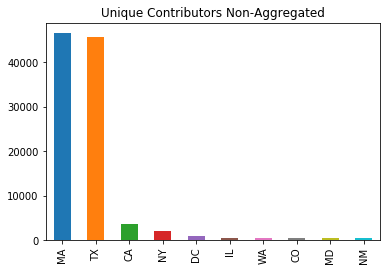

In [6]:
%matplotlib inline
info = pandas.read_csv("data/schedule_a-2018-10-14T00_45_54.csv")
keep = set(['report_year', 'report_type','entity_type', 'entity_type_desc',
       'contributor_prefix', 'contributor_name',
       'contributor_first_name', 'contributor_middle_name',
       'contributor_last_name', 'contributor_suffix', 'contributor_city', 'contributor_state',
       'contributor_occupation',
       'contributor_id',
       'contribution_receipt_amount',
       'contributor_aggregate_ytd'])
remove = list(set(info.columns).difference(keep))
info = info.drop(columns=remove)
state_counts = (info['contributor_state'].value_counts())
state_counts[0:10].plot.bar(title="Unique Contributors Non-Aggregated").get_figure().savefig("visualisation/Unique Contributors Non-Aggregated")

C:\Users\fred\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (12,22,34) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


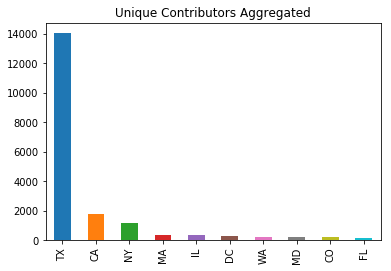

In [7]:
%matplotlib inline
info = pandas.read_csv("data/schedule_a-2018-10-14T00_45_54.csv")
keep = set(['entity_type',
            'contributor_name',
            'contributor_state',
            'contribution_receipt_amount'])
remove = list(set(info.columns).difference(keep))
info = info.drop(columns=remove)
unique_contributors_grouped = info.groupby(['contributor_name','contributor_state'])
sums = unique_contributors_grouped['contribution_receipt_amount'].sum()
new_info = pandas.DataFrame(sums).reset_index()
state_counts = new_info['contributor_state'].value_counts()
state_counts[0:10].plot.bar(title="Unique Contributors Aggregated").get_figure().savefig("visualisation/Unique Contributors Aggregated")

C:\Users\fred\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (12,22,34) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


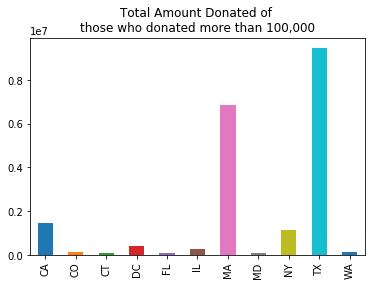

In [8]:
%matplotlib inline
info = pandas.read_csv("data/schedule_a-2018-10-14T00_45_54.csv")
keep = set(['entity_type',
            'contributor_name',
            'contributor_state',
            'contribution_receipt_amount'])
remove = list(set(info.columns).difference(keep))
info = info.drop(columns=remove)
unique_contributors_grouped = info.groupby(['contributor_state'])
sums = unique_contributors_grouped['contribution_receipt_amount'].sum()
new_info = pandas.DataFrame(sums).reset_index().set_index('contributor_state')
new_info = new_info[new_info["contribution_receipt_amount"]>100000]
new_info = pandas.Series(numpy.array([b[0] for b in new_info.values]),index=new_info.index.values.tolist())
new_info.plot.bar(title="Total Amount Donated of \nthose who donated more than 100,000").get_figure().savefig("visualisation/totals")

For this final chart I'm throwing out ACTBLUE from the tally as they seem to be a funnel of some kind They are based in MA so all of their donations come from MA, but the people who actually donated may not be from MA


C:\Users\fred\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (12,22,34) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


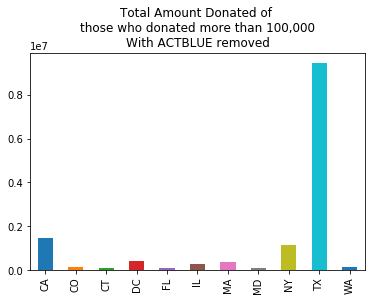

In [9]:
%matplotlib inline

print("For this final chart I'm throwing out ACTBLUE from the tally as they seem to be a funnel of some kind "
     "They are based in MA so all of their donations come from MA, but the people who actually donated "
     "may not be from MA")

info = pandas.read_csv("data/schedule_a-2018-10-14T00_45_54.csv")
keep = set(['entity_type',
            'contributor_name',
            'contributor_state',
            'contribution_receipt_amount'])
remove = list(set(info.columns).difference(keep))
info = info.drop(columns=remove)
info = info[info['contributor_name'].str.contains("ACTBLUE")==False]
unique_contributors_grouped = info.groupby(['contributor_state'])
sums = unique_contributors_grouped['contribution_receipt_amount'].sum()
new_info = pandas.DataFrame(sums).reset_index().set_index('contributor_state')
new_info = new_info[new_info["contribution_receipt_amount"]>100000]
new_info = pandas.Series(numpy.array([b[0] for b in new_info.values]),index=new_info.index.values.tolist())
new_info.plot.bar(title="Total Amount Donated of \nthose who donated more than 100,000\nWith ACTBLUE removed").get_figure().savefig("visualisation/ACTBLUE_Totals_removed")